In [94]:
import torch
import torch.nn as nn

In [95]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in /Users/boxtim/.cache/torch/hub/pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [96]:
nn.Sequential(*list(model.classifier.children())[:-1])

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
)

In [97]:
#Fine Tuning AlexNet
model.classifier = nn.Sequential(*list(model.classifier.children())[:-1])
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [12]:
#Get Data
from sklearn.datasets import fetch_lfw_pairs
import matplotlib.pyplot as plt
lfw_train = fetch_lfw_pairs(subset = 'train', color = True)

In [26]:
lfw_test = fetch_lfw_pairs(subset = 'test', color = True)

In [14]:
lfw_train.pairs.shape

(2200, 2, 62, 47, 3)

In [31]:
lfw_test.pairs.shape

(1000, 2, 62, 47, 3)

In [115]:
lfw_train.pairs[1,0,:,:,:]

array([[[129.,  98.,  32.],
        [161., 123.,  56.],
        [182., 144.,  74.],
        ...,
        [110.,  79.,  16.],
        [121.,  91.,  25.],
        [127.,  98.,  31.]],

       [[147., 117.,  47.],
        [176., 138.,  68.],
        [192., 153.,  81.],
        ...,
        [116.,  85.,  19.],
        [125.,  94.,  29.],
        [117.,  87.,  24.]],

       [[166., 134.,  63.],
        [188., 151.,  76.],
        [198., 159.,  84.],
        ...,
        [114.,  86.,  15.],
        [135., 105.,  38.],
        [143., 113.,  49.]],

       ...,

       [[120., 116.,  71.],
        [122., 117.,  74.],
        [140., 127.,  82.],
        ...,
        [199., 181., 125.],
        [115., 105.,  60.],
        [ 65.,  59.,  24.]],

       [[119., 117.,  72.],
        [117., 116.,  74.],
        [131., 123.,  83.],
        ...,
        [201., 183., 129.],
        [114., 104.,  64.],
        [ 63.,  58.,  26.]],

       [[119., 116.,  76.],
        [114., 117.,  78.],
        [120., 1

In [145]:
im1 = lfw_train.pairs[1,0,:,:,:]

In [146]:
im2 = lfw_train.pairs[1,1,:,:,:]

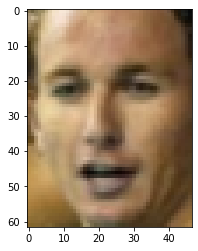

In [147]:
plt.imshow(im2.astype('uint8'))

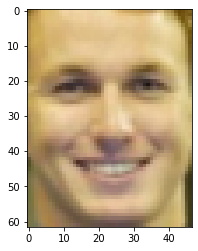

In [148]:
plt.imshow(im1.astype('uint8'))

In [27]:
# Get labels and Individual images
train_labels = lfw_train.target
test_labels = lfw_test.target

In [109]:
train_labels[1]

1

In [30]:
test_labels.shape

(1000,)

In [23]:
# Process Image Data
from PIL import Image
from torchvision import transforms

In [40]:
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#input_tensor = preprocess(input_image)
#input_batch = input_tensor.unsqueeze(0)

In [32]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

In [37]:
import numpy as np

In [149]:
input_tensor = preprocess(im1.astype(np.uint8))
input_batch = input_tensor.unsqueeze(0)
with torch.no_grad():
    output1 = model(input_batch)
a = output1.numpy()

In [150]:
np.sum(a)

1129.3684

In [151]:
input_tensor2 = preprocess(im2.astype(np.uint8))
input_batch2 = input_tensor2.unsqueeze(0)
with torch.no_grad():
    output2 = model(input_batch2)
b = output2.numpy()

In [152]:
np.sum(b)

972.9517

In [114]:
dist = np.linalg.norm(a - b)
 
# printing Euclidean distance
print(dist)

36.139404


In [164]:
train_dist = []
for idx in range(train_labels.shape[0]):
    im1 = lfw_train.pairs[idx,0,:,:,:]
    input_tensor = preprocess(im1.astype(np.uint8))
    input_batch = input_tensor.unsqueeze(0)
    with torch.no_grad():
        output1 = model(input_batch)
    a = output1.numpy()
    
    im2 = lfw_train.pairs[idx,1,:,:,:]
    input_tensor2 = preprocess(im2.astype(np.uint8))
    input_batch2 = input_tensor2.unsqueeze(0)
    with torch.no_grad():
        output2 = model(input_batch2)
    b = output2.numpy()
    
    dist = np.linalg.norm(a - b)
    train_dist.append(dist)

In [165]:
len(train_dist)

2200

In [169]:
from sklearn import preprocessing
#Normalize the list
train_dist1 = np.array(train_dist).reshape(-1,1)

scaler = preprocessing.MinMaxScaler()
norm_train_dist = scaler.fit_transform(train_dist1)

In [198]:
train_predict = []
for i in norm_train_dist:
    if i <= 0.3:
        train_predict.append(1)
    else:
        train_predict.append(0)

In [199]:
train_predict == train_labels

array([ True, False,  True, ..., False,  True, False])

In [200]:
sum(train_predict == train_labels) / len(train_predict)

0.6313636363636363

In [201]:
#ROC
from sklearn import metrics
import matplotlib.pyplot as plt

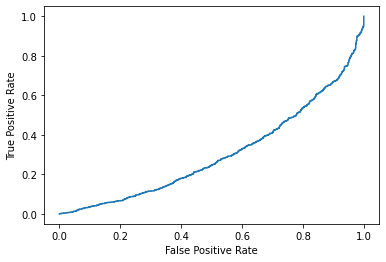

In [204]:
fpr, tpr, thresholds = metrics.roc_curve(train_labels, norm_train_dist)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [207]:
AUC = metrics.roc_auc_score(train_labels, norm_train_dist)
print('AUC', AUC)

AUC 0.3036904958677686


In [120]:
from torch.utils.data import Dataset, DataLoader

In [126]:
# Data Loader

class NumberDataset(Dataset):
    
    def __init__(self, trainSel):
        self.trainingData = trainSel
        if trainSel ==1:
            self.numEntries = len(train_labels)
        else:
            self.numEntries = len(test_labels)
            
    def __len__(self):
        return self.numEntries
    
    def __getitem__(self, idx):
        if self.trainingData == 1:
            singleImage = lfw_train.pairs[idx,0,:,:,:]
            im1 = preprocess(singleImage.astype(np.uint8))
            image1 = im1.unsqueeze(0)
            
            secondImage = lfw_train.pairs[idx,1,:,:,:]
            im2 = preprocess(secondImage.astype(np.uint8))
            image2 = im2.unsqueeze(0)
            
            label = train_labels[idx]
            return image1, image2, label
            
        else:
            
            singleImage = lfw_test.pairs[idx,0,:,:,:]
            im1 = preprocess(singleImage.astype(np.uint8))
            image1 = im1.unsqueeze(0)
            
            secondImage = lfw_test.pairs[idx,1,:,:,:]
            im2 = preprocess(secondImage.astype(np.uint8))
            image2 = im2.unsqueeze(0)
            
            label = test_labels[idx] 
            
            return image1, image2, label
        
                

In [127]:
train_set = NumberDataset(1)
train_loader = DataLoader(train_set, batch_size = 60, shuffle = True, num_workers = 0)

In [128]:
train_distance = []
for i, data in enumerate(train_loader,0):
    inputs, labels = data
    inputs, labels = Variable(inputs), Variable(labels)

ValueError: too many values to unpack (expected 2)

In [132]:
data[0][1]


torch.Size([1, 3, 224, 224])

In [153]:
with torch.no_grad():
    output2 = model(data[0][1])
b = output2.numpy()



In [154]:
np.sum(b)


977.9174

In [155]:
data[1][1].shape

torch.Size([1, 3, 224, 224])

In [156]:
with torch.no_grad():
    output2 = model(data[1][1])
b = output2.numpy()



In [157]:
np.sum(b)


1041.5334

In [160]:
g = lfw_train.pairs[1,0,:,:,:]

In [161]:
preprocess(g.astype(np.uint8)).shape

torch.Size([3, 224, 224])